In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.xkcd()

In [2]:
legs = np.array([3.8, 4.8, 6.7])
print('short', legs)
legs_full  = np.tile(legs,8)
legs_ultra = legs_full[:12]+legs_full[1:13]
legs_full  = np.insert(legs_full, 0, 0.)
legs_ultra = np.insert(legs_ultra, 0, 0.)
print('full ', legs_full, legs_full.size, legs_full.sum())
print('ultra', legs_ultra, legs_ultra.size, legs_ultra.sum())

runner = np.array([1,2,3,4])
runner = np.repeat(runner,2)
runner = np.tile(runner,3)
runner = np.insert(runner, 0, 0)
print('runner', runner, runner.size)

short [ 3.8  4.8  6.7]
full  [ 0.   3.8  4.8  6.7  3.8  4.8  6.7  3.8  4.8  6.7  3.8  4.8  6.7  3.8  4.8
  6.7  3.8  4.8  6.7  3.8  4.8  6.7  3.8  4.8  6.7] 25 122.4
ultra [  0.    8.6  11.5  10.5   8.6  11.5  10.5   8.6  11.5  10.5   8.6  11.5
  10.5] 13 122.4
runner [0 1 1 2 2 3 3 4 4 1 1 2 2 3 3 4 4 1 1 2 2 3 3 4 4] 25


In [3]:
race = pd.DataFrame({'leg':np.arange(25),
                     'distance':legs_full,
                     'runner': runner,
                  })
race['distance_accum'] = np.add.accumulate(race['distance'])

race

,distance,leg,runner,distance_accum
0,0.0,0,0,0.0
1,3.8,1,1,3.8
2,4.8,2,1,8.6
3,6.7,3,2,15.3
4,3.8,4,2,19.1
5,4.8,5,3,23.9
6,6.7,6,3,30.6
7,3.8,7,4,34.4
8,4.8,8,4,39.2
9,6.7,9,1,45.9


<IPython.core.display.Javascript object>


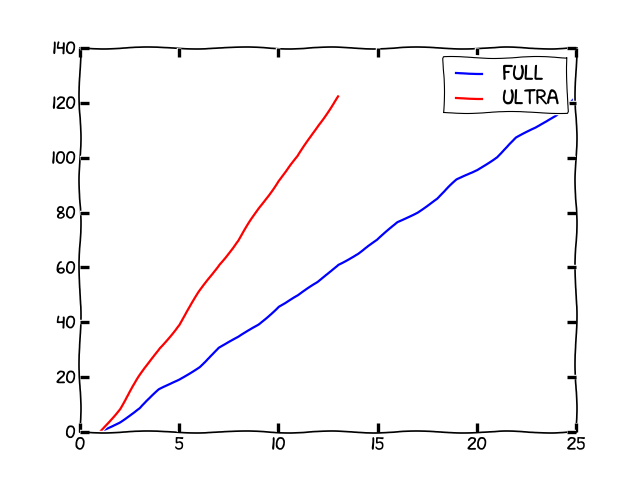

In [4]:
fig, axes  = plt.subplots()
axes.plot(np.arange(legs_full.size)+1, np.add.accumulate(legs_full), label='full')
axes.plot(np.arange(legs_ultra.size)+1, np.add.accumulate(legs_ultra), label='ultra')
axes.legend()

In [5]:
runners = pd.DataFrame({'runner':np.arange(5),
                        'name':['NA', 'Dan', 'Josh', 'Pete', 'Ross'],
                        'pace':[np.timedelta64(int(0), 's'),
                                np.timedelta64(int(10*60), 's'),
                                np.timedelta64(int(10*60), 's'),
                                np.timedelta64(int(10*60), 's'),
                                np.timedelta64(int(10*60), 's')]})
runners = runners.set_index('runner') # must be a better way
runners

,name,pace
runner,,
0,NA,00:00:00
1,Dan,00:10:00
2,Josh,00:10:00
3,Pete,00:10:00
4,Ross,00:10:00


In [6]:
# taken from https://www.timeanddate.com/sun/usa/atlanta
sunset = np.datetime64('2017-04-21T20:13')
sunrise = np.datetime64('2017-04-22T06:57')

In [7]:
time_error = np.timedelta64(int(30), 's')
time_zero = np.timedelta64(int(0), 's')
leg_time = []
leg_time_fast = []
leg_time_slow = []
for index, row in race.iterrows():
    if row.runner == 0:
        leg_time.append(time_zero)
        leg_time_fast.append(time_zero)
        leg_time_slow.append(time_zero)
    else:
        leg_time.append(row.distance*runners.loc[row.runner].pace)
        leg_time_fast.append(row.distance*(runners.loc[row.runner].pace-time_error))
        leg_time_slow.append(row.distance*(runners.loc[row.runner].pace+time_error))
race['time'] = leg_time
race['time_fast'] = leg_time_fast
race['time_slow'] = leg_time_slow
race['time_accum'] = np.add.accumulate(race['time'])
race['time_accum_fast'] = np.add.accumulate(race['time_fast']) 
race['time_accum_slow'] = np.add.accumulate(race['time_slow']) 
race

,distance,leg,runner,distance_accum,time,time_fast,time_slow,time_accum,time_accum_fast,time_accum_slow
0,0.0,0,0,0.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
1,3.8,1,1,3.8,00:38:00,00:36:06,00:39:54,00:38:00,00:36:06,00:39:54
2,4.8,2,1,8.6,00:48:00,00:45:36,00:50:24,01:26:00,01:21:42,01:30:18
3,6.7,3,2,15.3,01:07:00,01:03:39,01:10:21,02:33:00,02:25:21,02:40:39
4,3.8,4,2,19.1,00:38:00,00:36:06,00:39:54,03:11:00,03:01:27,03:20:33
5,4.8,5,3,23.9,00:48:00,00:45:36,00:50:24,03:59:00,03:47:03,04:10:57
6,6.7,6,3,30.6,01:07:00,01:03:39,01:10:21,05:06:00,04:50:42,05:21:18
7,3.8,7,4,34.4,00:38:00,00:36:06,00:39:54,05:44:00,05:26:48,06:01:12
8,4.8,8,4,39.2,00:48:00,00:45:36,00:50:24,06:32:00,06:12:24,06:51:36
9,6.7,9,1,45.9,01:07:00,01:03:39,01:10:21,07:39:00,07:16:03,08:01:57


In [8]:
time_start = np.datetime64('2017-04-21T12:00')
for label in ['time_accum', 'time_accum_fast', 'time_accum_slow']:
    race[label] = [ time_start+time_accum for time_accum in race[label]]
race

,distance,leg,runner,distance_accum,time,time_fast,time_slow,time_accum,time_accum_fast,time_accum_slow
0,0.0,0,0,0.0,00:00:00,00:00:00,00:00:00,2017-04-21 12:00:00,2017-04-21 12:00:00,2017-04-21 12:00:00
1,3.8,1,1,3.8,00:38:00,00:36:06,00:39:54,2017-04-21 12:38:00,2017-04-21 12:36:06,2017-04-21 12:39:54
2,4.8,2,1,8.6,00:48:00,00:45:36,00:50:24,2017-04-21 13:26:00,2017-04-21 13:21:42,2017-04-21 13:30:18
3,6.7,3,2,15.3,01:07:00,01:03:39,01:10:21,2017-04-21 14:33:00,2017-04-21 14:25:21,2017-04-21 14:40:39
4,3.8,4,2,19.1,00:38:00,00:36:06,00:39:54,2017-04-21 15:11:00,2017-04-21 15:01:27,2017-04-21 15:20:33
5,4.8,5,3,23.9,00:48:00,00:45:36,00:50:24,2017-04-21 15:59:00,2017-04-21 15:47:03,2017-04-21 16:10:57
6,6.7,6,3,30.6,01:07:00,01:03:39,01:10:21,2017-04-21 17:06:00,2017-04-21 16:50:42,2017-04-21 17:21:18
7,3.8,7,4,34.4,00:38:00,00:36:06,00:39:54,2017-04-21 17:44:00,2017-04-21 17:26:48,2017-04-21 18:01:12
8,4.8,8,4,39.2,00:48:00,00:45:36,00:50:24,2017-04-21 18:32:00,2017-04-21 18:12:24,2017-04-21 18:51:36
9,6.7,9,1,45.9,01:07:00,01:03:39,01:10:21,2017-04-21 19:39:00,2017-04-21 19:16:03,2017-04-21 20:01:57


In [9]:
distance_bounds = [race.distance_accum[0], race.distance_accum[race.distance_accum.size-1]]
time_bounds = [race.time_accum_slow[0], race.time_accum_slow[race.distance_accum.size-1]]

<IPython.core.display.Javascript object>


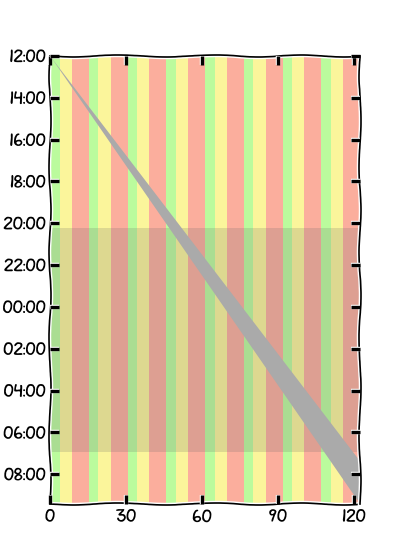

In [10]:
fig, axes  = plt.subplots(figsize=(5,7))

# color the legs
colors = ['#bbfb9d', '#fbf59b', '#fbae9d']
for i in range(race.distance_accum.size-1):
    axes.fill_between([race.distance_accum[i], race.distance_accum[i+1]], time_bounds[0], time_bounds[1],
                      facecolor=colors[i%3], linewidth=0)

# sunrise/sunset
axes.fill_between(distance_bounds, [sunset, sunset],
                  [sunrise, sunrise], facecolor='#666666', linewidth=0, alpha=.2)

# predict range of times
axes.fill_between(race.distance_accum,
                  race['time_accum_slow'].values, race['time_accum_fast'].values,
                  facecolor='#aaaaaa', linewidth=0)

# format the y-axis
axes.yaxis.set_major_locator(matplotlib.dates.HourLocator(interval=2))
axes.yaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M'))
axes.invert_yaxis()

# format the x-axis
axes.set_xlim(distance_bounds[0], distance_bounds[1])
axes.xaxis.set_major_locator(matplotlib.ticker.FixedLocator([0.,30.,60.,90.,120.]))

#axes.set_aspect(200)

fig.savefig('docs/AtlantaRagnar2017/race.svg')